# Register PET to MNI atlas

In [1]:
import ants
import matplotlib 
import subprocess
import numpy as np

Load MNI atlas

In [2]:
mni = ants.get_data('mni')
mni_img = ants.image_read(mni)

Load MRI

In [65]:
mri_img = ants.image_read('Hammers/a01.nii.gz')

Load PET

In [9]:
# Convert dicom to nifty
if subprocess.call(['dcm2niix', 'dicom_pet']): print('Good luck next time with this .dcm format')
# Load pet
pet_img = ants.image_read('dicom_pet/dicom_pet_Brain-FDG_20070801103000_0.nii')


<h4 style="color:blue;">Register PET to MRI</h4>

In [10]:
reg_pet2mri = ants.registration( mri_img, pet_img, 'SyN', reg_iterations = [100,100,20] )

<h4 style="color:blue;">Register MRI to MNI</h4>

In [24]:
reg_mri2mni = ants.registration( mni_img, mri_img, 'SyN', reg_iterations = [100,100,20] )

<h4 style="color:blue;">Chain Matrix + warp fields</h4>

In [47]:
nice_soup = reg_mri2mni[ 'invtransforms'] + reg_pet2mri[ 'invtransforms']

<h4 style="color:blue;">Apply chained deformations</h4>

In [61]:
mywarpedimage = ants.apply_transforms( fixed = mni_img, 
                                       moving = pet_img , 
                                       transformlist = nice_soup, 
                                       interpolator  = 'nearestNeighbor', 
                                       whichtoinvert = [False,False,False,False])

### Plot PET aligned to MNI atlas through MRI co-registration

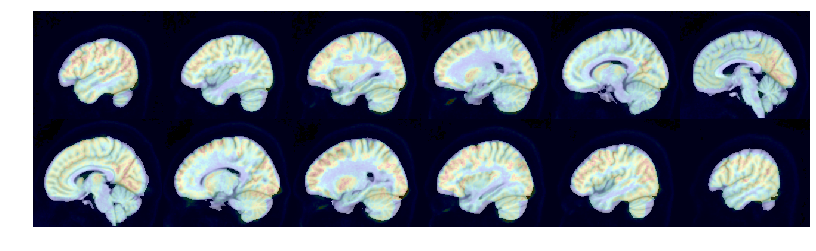

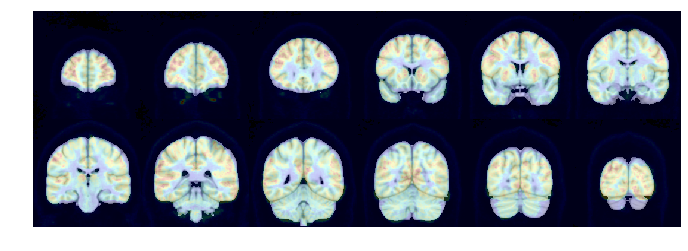

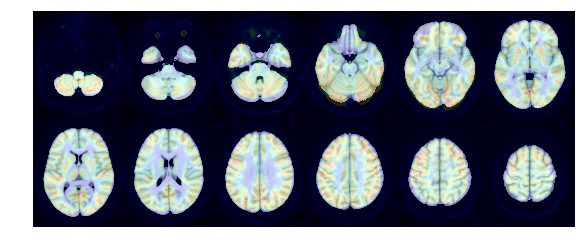

In [64]:
for i in range(3):
    ants.plot( mni_img, mywarpedimage, overlay_alpha = 0.2, axis=i, ncol=6 )

### PET evolution:
#### 1. Raw PET

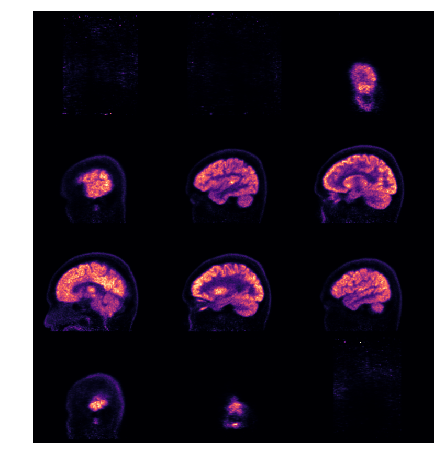

In [66]:
getting_wild = matplotlib.cm.get_cmap('magma')
pet_img.plot(cmap=getting_wild)

#### 2. PET aligned to MRI

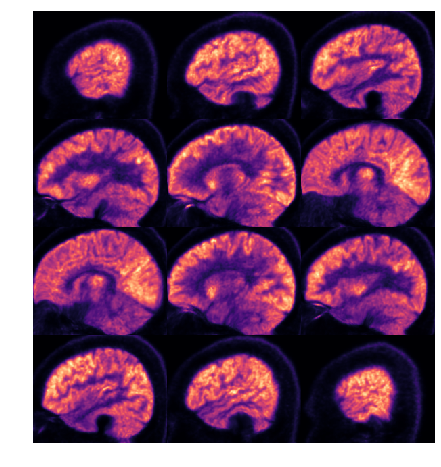

In [67]:
reg_pet2mri['warpedmovout'].plot(cmap=getting_wild)

#### 3. Pet aligned to MNI atlas

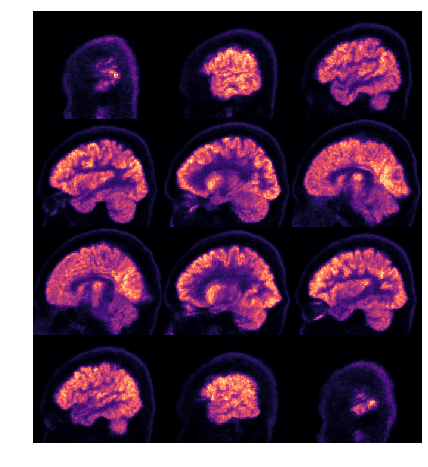

In [68]:
mywarpedimage.plot(cmap=getting_wild)

# NOTES 

## 1. Explore this option
1. I could probably average 4D pet images to 3D.
2. Co-register 3D PET to 3D MRI.
3. Apply warping field from step 2 to each time slice and get the 4D co-registration.

## 2. If I segment the MRI and then co-register PET, how can I query specific areas